## Feature scaling 
* 1) Standard scaling  --> (xi-mean)/sigma
* 2) Normalize scaling --> min max ---> (xi-xmin)/(xmax-xmin)


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/Social_Network_Ads.csv")

In [4]:
# in this we take only last three col
df = df.iloc[:,2:]
df.head()
# as show in data there is large vary of data in b/w age and salary 

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

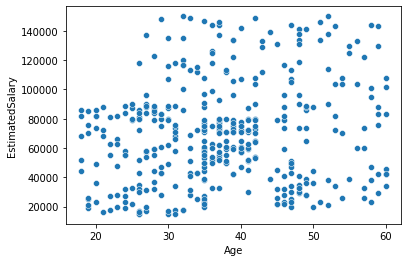

In [7]:
sns.scatterplot(df.iloc[:,0],df.iloc[:,1])

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 2)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()

model.add(Dense(128,activation = "relu",input_dim = 2))
model.add(Dense(1,activation = "sigmoid"))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               384       
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [19]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 36ms/step - loss: 2108.6199 - accuracy: 0.3656 - val_loss: 684.5165 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 809.9218 - accuracy: 0.6531 - val_loss: 475.9842 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 345.1017 - accuracy: 0.4969 - val_loss: 88.3598 - val_accuracy: 0.4000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 203.7989 - accuracy: 0.5906 - val_loss: 80.7116 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 42.1553 - accuracy: 0.5094 - val_loss: 8.4019 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 24.8194 - accuracy: 0.5188 - val_loss: 139.6717 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 96.6974 - accuracy: 0.5406 - val_loss: 121.3926 - val_accurac

In [ ]:
# as shown as that validation accuracy goes upto only --> 60 percentage

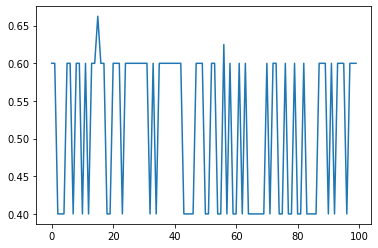

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [21]:

# this buzzy or unstable graph occurs due to "Unstable of data"

** Scaling **

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

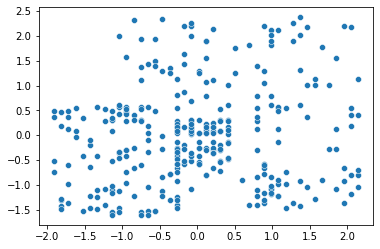

In [26]:
sns.scatterplot(X_train_scaled[:,0],X_train_scaled[:,1])

In [27]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 44ms/step - loss: 0.6729 - accuracy: 0.6187 - val_loss: 0.6330 - val_accuracy: 0.9000
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 0.6162 - accuracy: 0.8469 - val_loss: 0.5797 - val_accuracy: 0.8375
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5700 - accuracy: 0.8594 - val_loss: 0.5337 - val_accuracy: 0.8375
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5298 - accuracy: 0.8594 - val_loss: 0.4934 - val_accuracy: 0.8125
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4929 - accuracy: 0.8531 - val_loss: 0.4586 - val_accuracy: 0.8125
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4622 - accuracy: 0.8594 - val_loss: 0.4296 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4349 - accuracy: 0.8625 - val_loss: 0.4047 - val_accuracy: 0.8250
Epoch 8/100

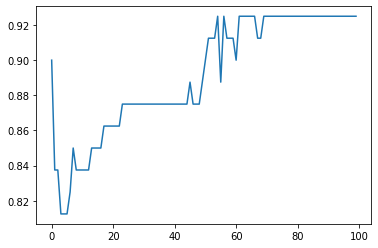

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [29]:
# as shown that validation accuracy increase upto 92%